# Effect of spectral resolution on refractive layer transmission
In notebook 0 we showed that the output of a multilayer optical calculation performed with Windt's (IDL) IMD software and Byrnes' (python) TMM package gave the same result. We also converted Windt's method for introducing an instrument spectral resolution into python script. In this notebook we show the explicit effect of reducing the spectral resolution of the simulation output.

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [1]:
import funcs

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('presentation')
%matplotlib notebook

import warnings
warnings.simplefilter('ignore')

In [2]:
# Define paths to data
workDir   = '/Users/ioannisa/Desktop/python/miri_devel/'
nkDir     = workDir+'nk/'
datapath  = 'data/'

In [3]:
# initialize placeholders and wavelength scale
Refl,Transm,Absorp = {},{},{}
wav = {'1A':np.linspace(4.8,5.8,10000),'1B':np.linspace(5.6,6.7,10000)}

### Test case: single silicon layer

In [9]:
for band in ['1A','1B']:
    Refl[band],Transm[band],Absorp[band] = [np.zeros(len(wav[band])) for i in range(3)]
    for i,wvl in enumerate(wav[band]):
        n_Si = funcs.indexOfRefractionSi(wvl)

        # define stack of refractive layers
        n_list = [1,n_Si, 1] # refractive index
        d_list = [np.inf, 465e3, np.inf] # thickness, nanometers
        lambda_vac = wvl*1000 # convert microns to nanometers
        # solve the Fresnel equations using the Transfer-Matrix Method
        Refl[band][i],Transm[band][i],Absorp[band][i] =  funcs.simple_tmm(n_list, d_list, 0, lambda_vac)

<IPython.core.display.Javascript object>


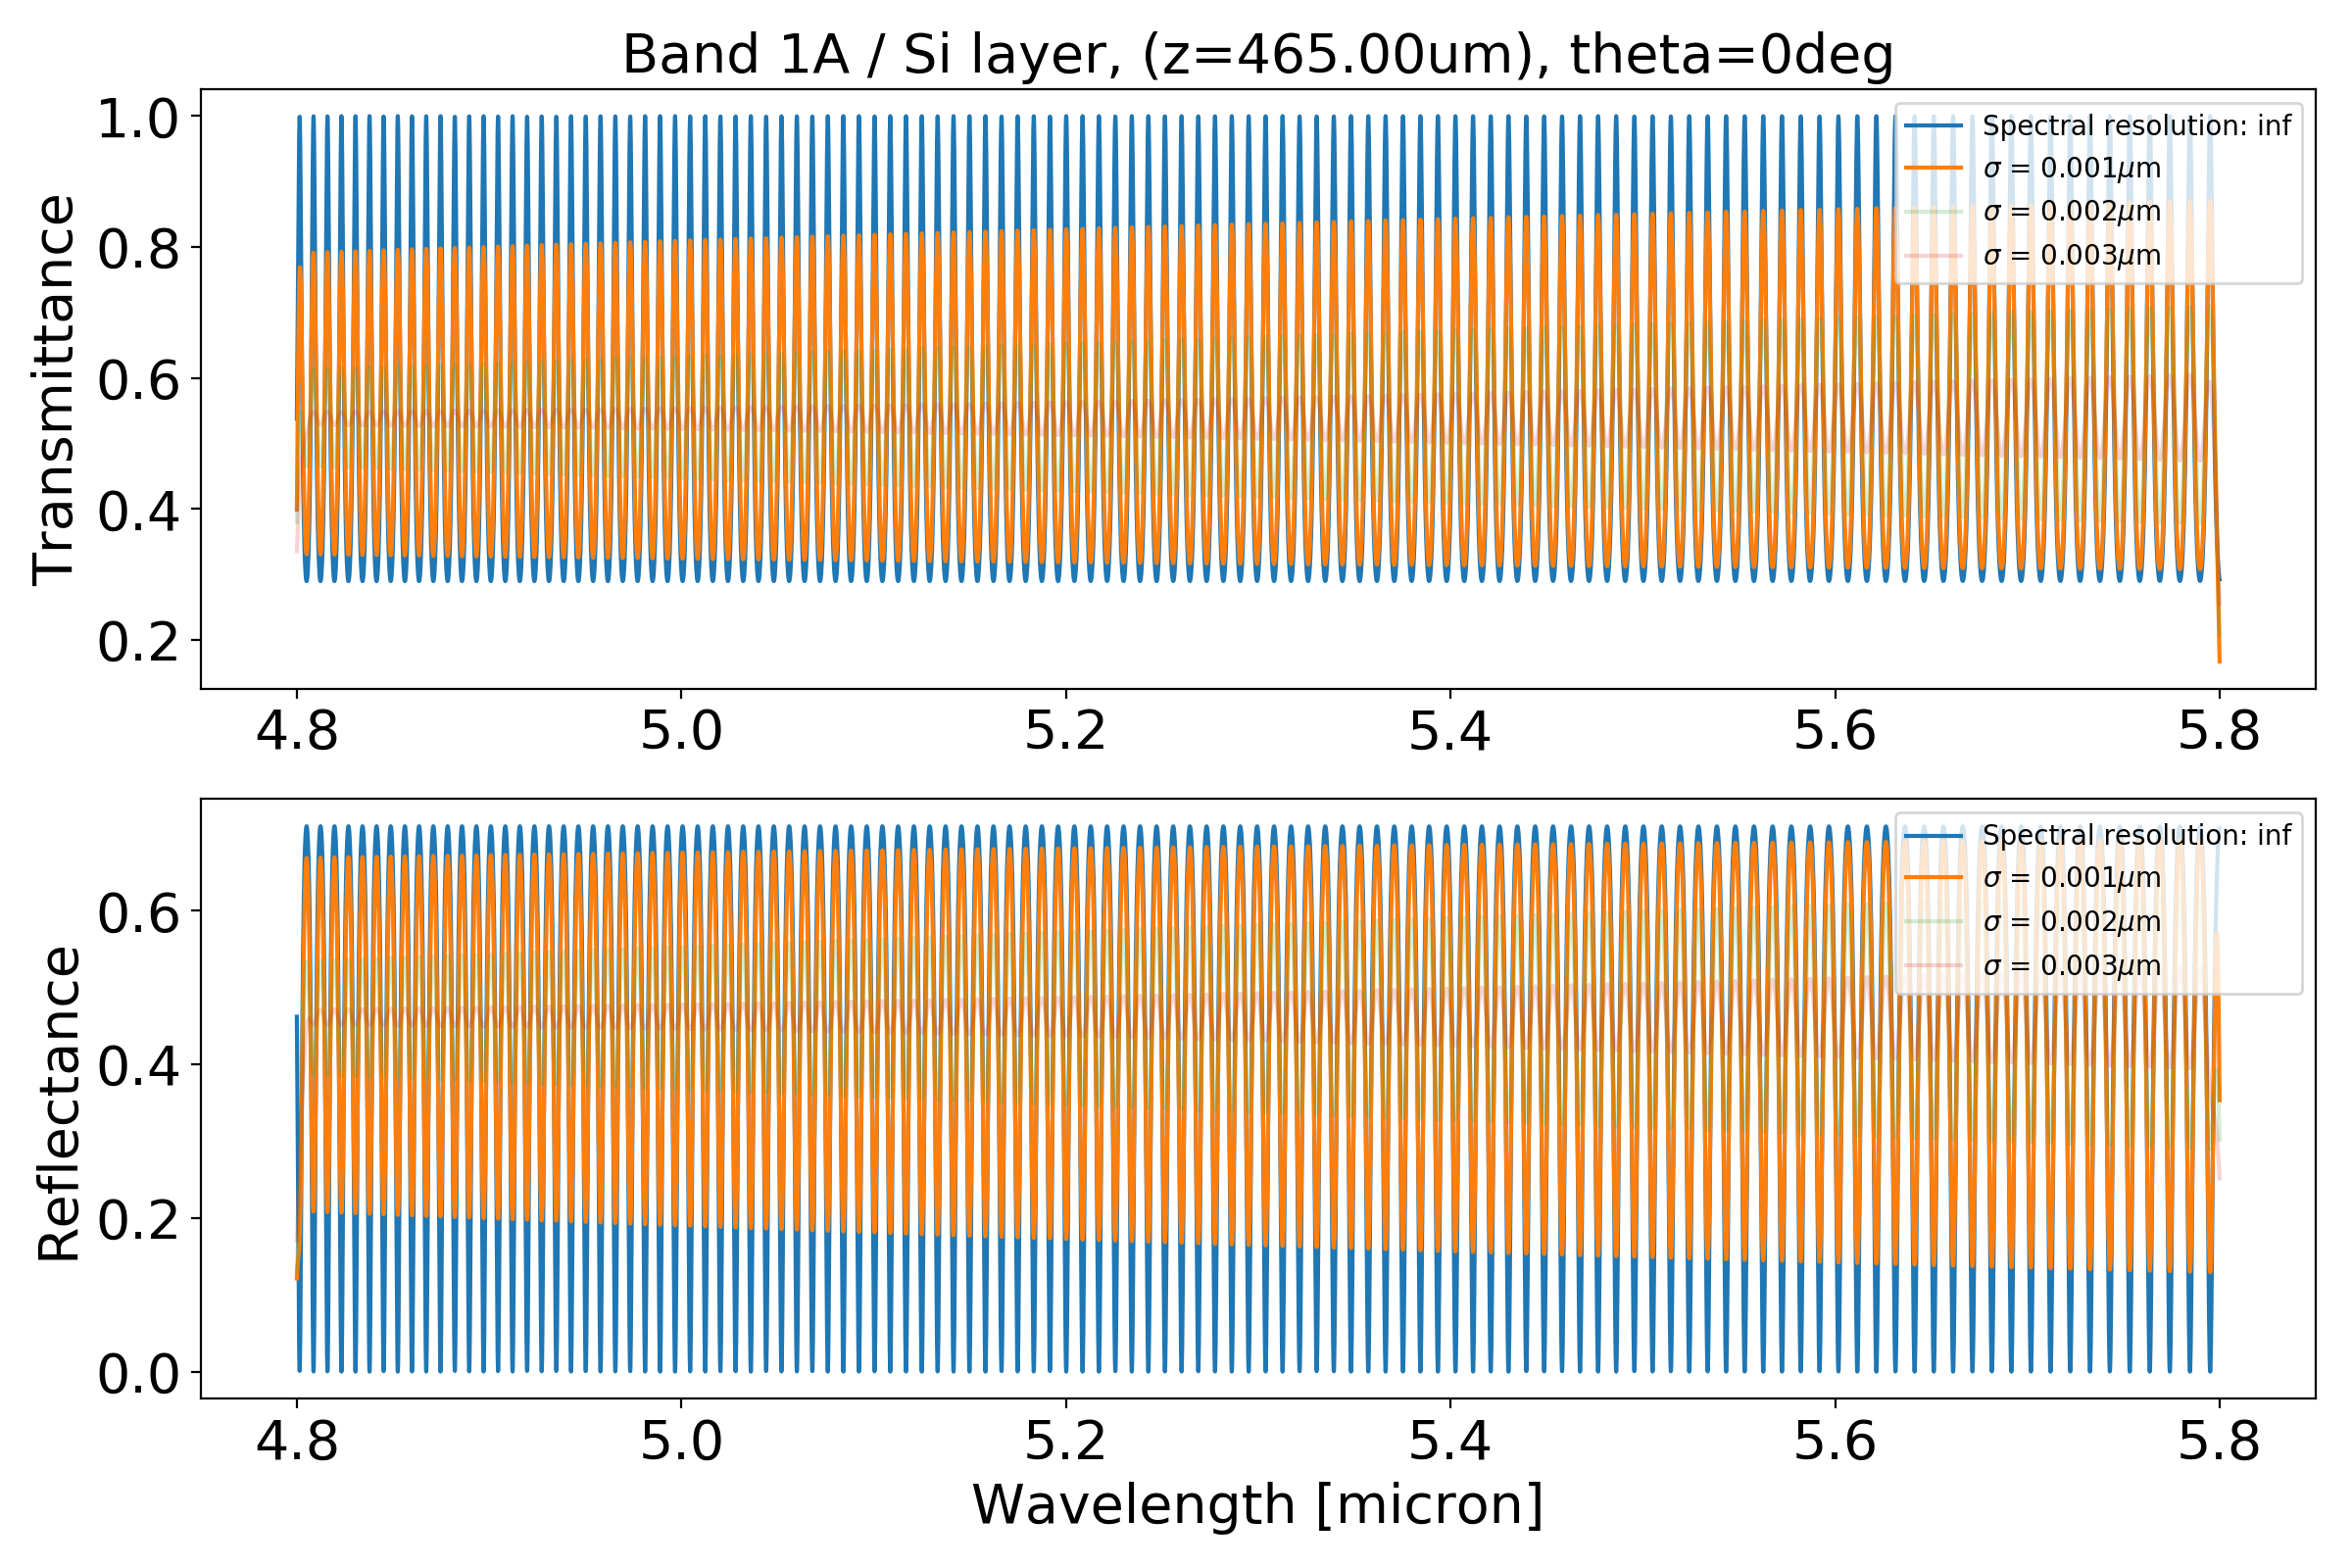

In [14]:
plt.close('all')
for band in ['1A']:
    setup = 'Band {} / Si layer, (z=465.00um), theta=0deg'.format(band)
    fig,axs = plt.subplots(2,1,figsize=(12,8))
    axs[0].set_title(setup)
    axs[0].plot(wav[band],Transm[band],label='Spectral resolution: inf')
    axs[0].plot(wav[band],funcs.convolvegauss_windt(wav[band],Transm[band],0.001),label='$\sigma$ = 0.001$\mu$m')
    axs[0].plot(wav[band],funcs.convolvegauss_windt(wav[band],Transm[band],0.002),label='$\sigma$ = 0.002$\mu$m',alpha=0.2)
    axs[0].plot(wav[band],funcs.convolvegauss_windt(wav[band],Transm[band],0.003),label='$\sigma$ = 0.003$\mu$m',alpha=0.2)
    axs[0].set_ylabel('Transmittance')
    axs[0].legend(loc='upper right',fontsize=10)
    axs[1].plot(wav[band],Refl[band],label='Spectral resolution: inf')
    axs[1].plot(wav[band],funcs.convolvegauss_windt(wav[band],Refl[band],0.001),label='$\sigma$ = 0.001$\mu$m')
    axs[1].plot(wav[band],funcs.convolvegauss_windt(wav[band],Refl[band],0.002),label='$\sigma$ = 0.002$\mu$m',alpha=0.2)
    axs[1].plot(wav[band],funcs.convolvegauss_windt(wav[band],Refl[band],0.003),label='$\sigma$ = 0.003$\mu$m',alpha=0.2)
    axs[1].set_xlabel('Wavelength [micron]')
    axs[1].set_ylabel('Reflectance')
    axs[1].legend(loc='upper right',fontsize=10)
    plt.tight_layout()

### Remarks:
* As expected the fringe contrast reduces with larger sigma (smaller spectral resolving power). (For the sake of clarity,) we also notice that the fringe peaks do not move w.r.t. their original positions.

What happens when jumping from one spectral resolution to another? (e.g. going from MRS band 1A, to band 1B)

<IPython.core.display.Javascript object>


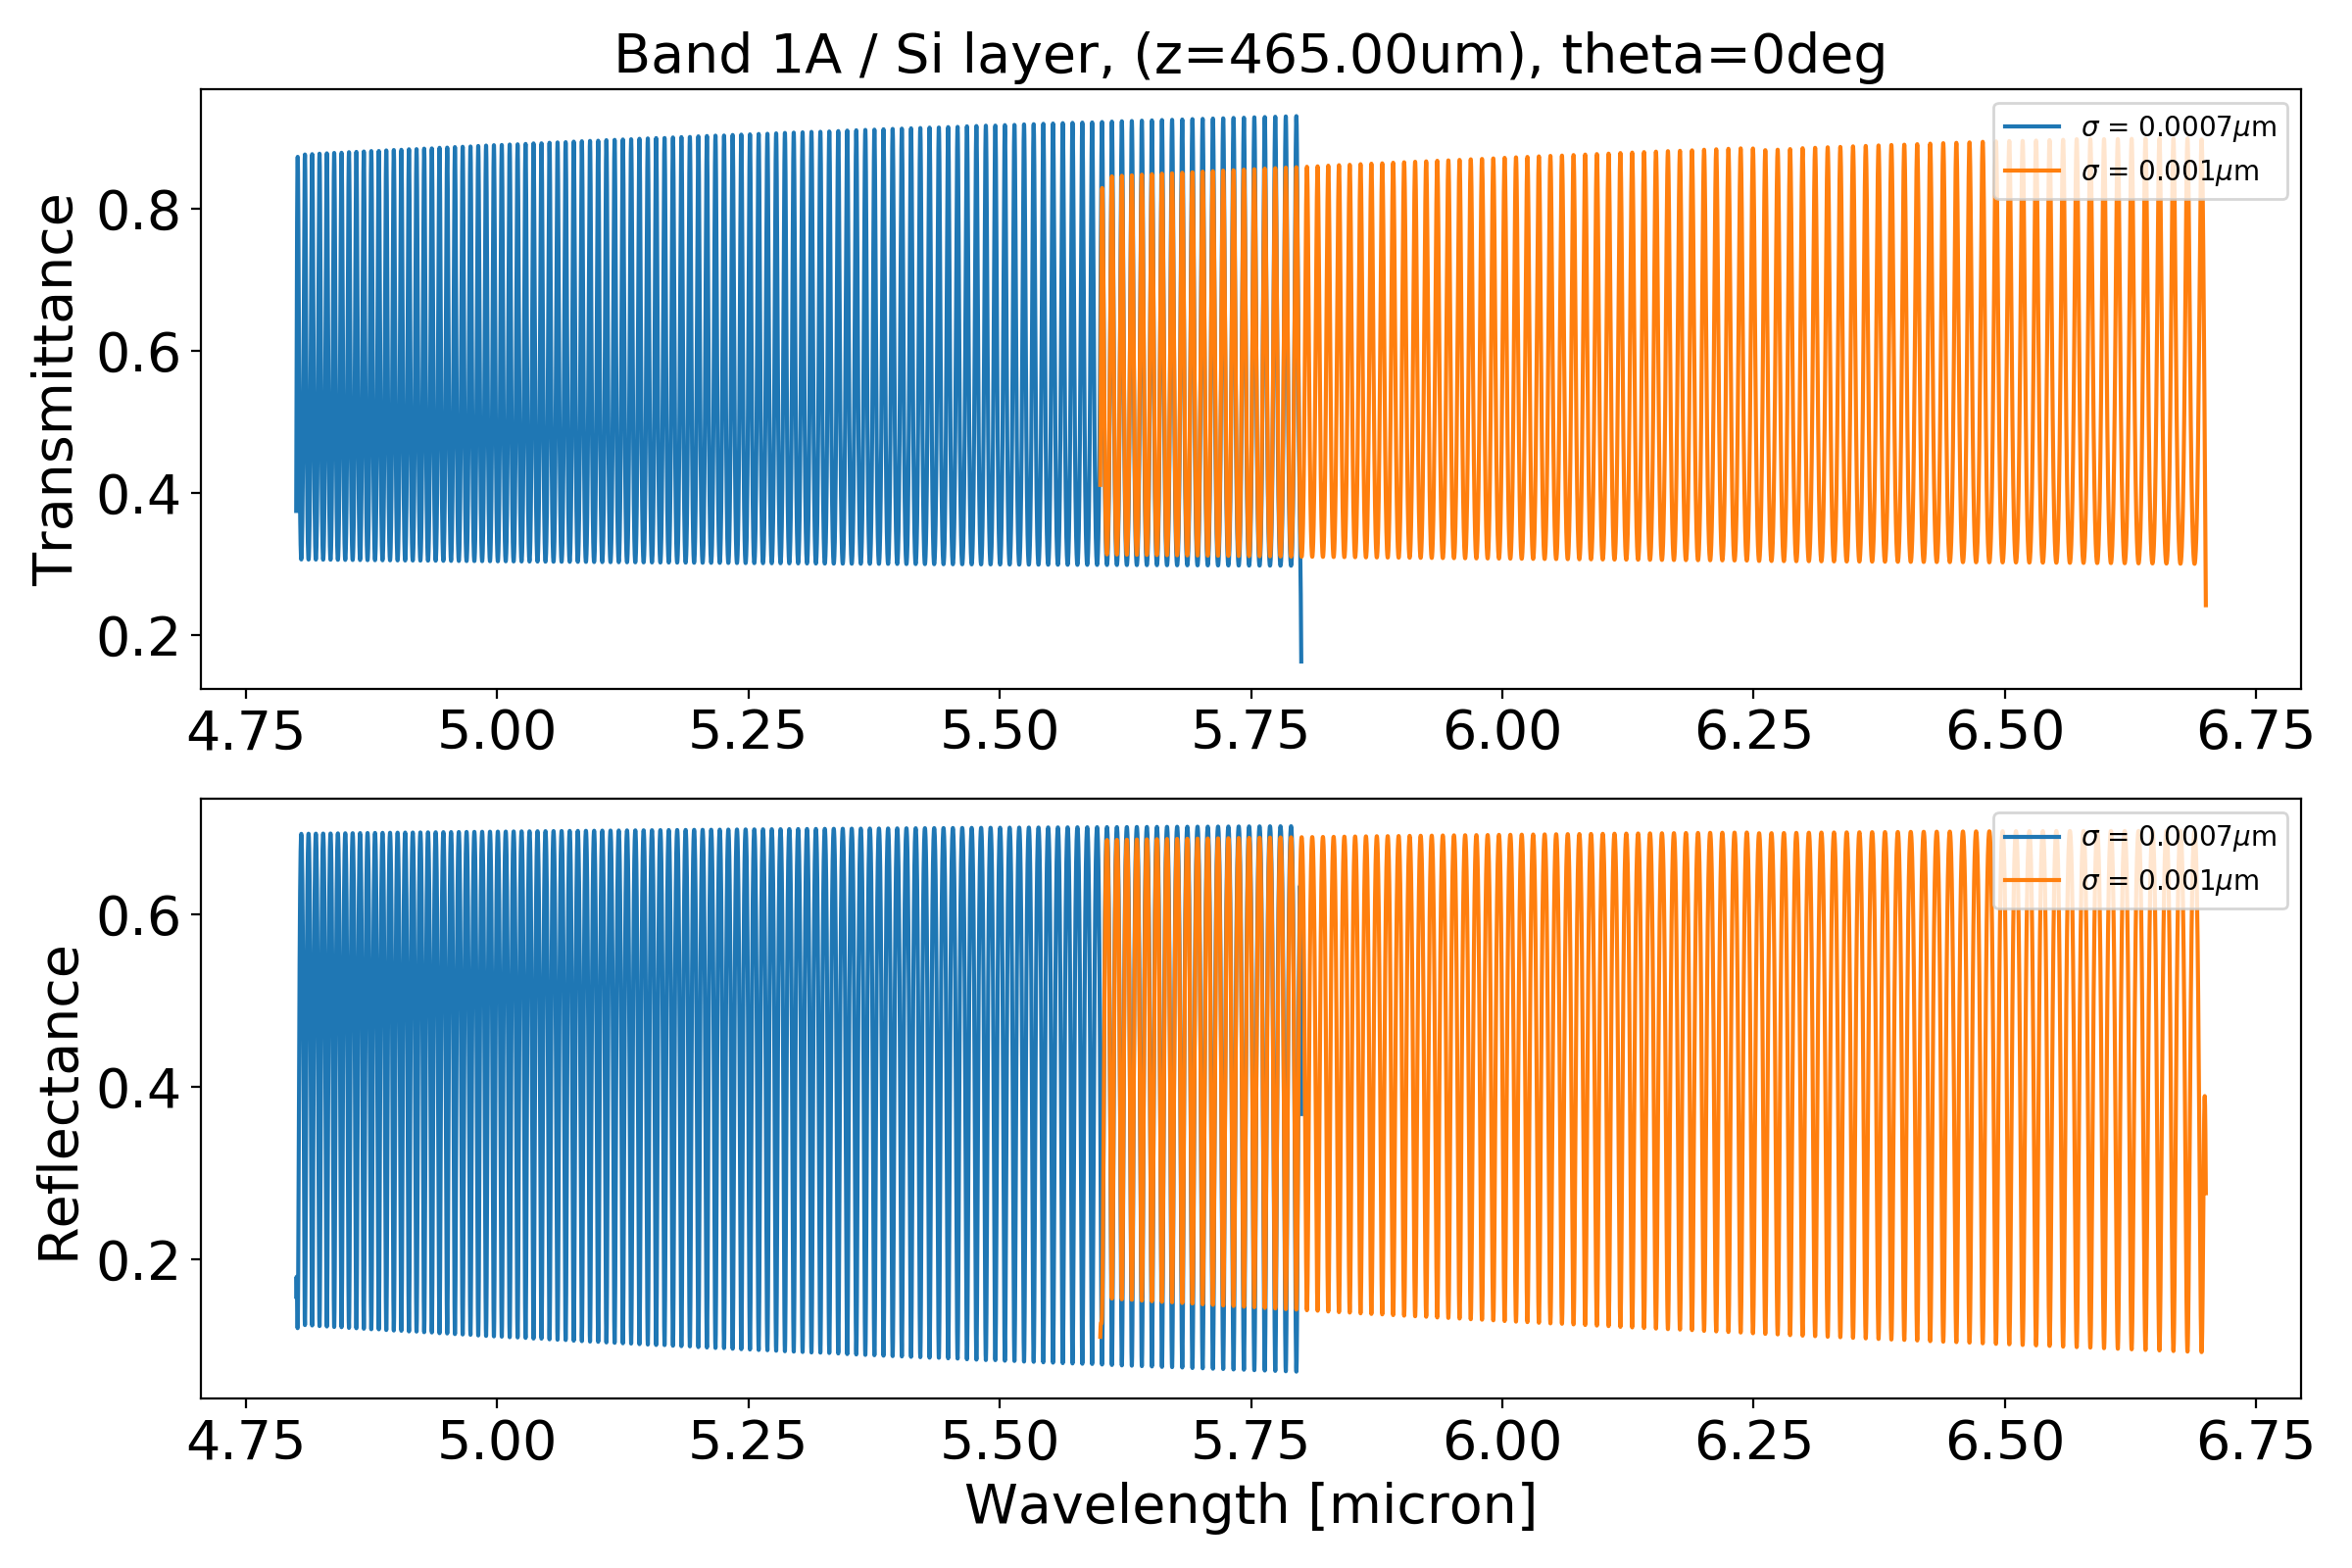

In [15]:
plt.close('all')
setup = 'Band {} / Si layer, (z=465.00um), theta=0deg'.format(band)
fig,axs = plt.subplots(2,1,figsize=(12,8))
axs[0].set_title(setup)
axs[0].plot(wav['1A'],funcs.convolvegauss_windt(wav['1A'],Transm['1A'],0.000666),label='$\sigma$ = 0.0007$\mu$m')
axs[0].plot(wav['1B'],funcs.convolvegauss_windt(wav['1B'],Transm['1B'],0.001068),label='$\sigma$ = 0.001$\mu$m')
axs[0].set_ylabel('Transmittance')
axs[0].legend(loc='upper right',fontsize=10)
axs[1].plot(wav['1A'],funcs.convolvegauss_windt(wav['1A'],Refl['1A'],0.000666),label='$\sigma$ = 0.0007$\mu$m')
axs[1].plot(wav['1B'],funcs.convolvegauss_windt(wav['1B'],Refl['1B'],0.001068),label='$\sigma$ = 0.001$\mu$m')
axs[1].set_xlabel('Wavelength [micron]')
axs[1].set_ylabel('Reflectance')
axs[1].legend(loc='upper right',fontsize=10)
plt.tight_layout()

### Remarks:
* A jump in spectral resolution leads to a predictable discontinuity in the fringe contrast.